In [1]:
%matplotlib inline

import glob
from platform import python_version
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
# import torch#   Preprocessing

#   Preprocessing

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')
df=df.sort_values(by=['id', 'time'])
df=df.drop(columns=['Unnamed: 0'])

In [3]:
# convert data into right format

#  convert to day
def convert_time(df):
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.date
    return df



def aggragate(df):
    # group by time and user_id to get the user action per day
    user_df = df.set_index(['id','time']).groupby(['id','time','variable']).mean().reset_index()
    #  convert each user activity variable to a sigle column
    user_df = user_df.pivot(index=['id','time'],columns='variable', values='value').reset_index()
    return user_df


user_list = df.id.value_counts().keys()
var_list = [str(i) for i in list(df.variable.value_counts().keys())]

df

,id,time,variable,value
136470,AS14.01,2014-02-17 12:04:42.394,call,1.000
136471,AS14.01,2014-02-17 18:28:25.520,call,1.000
136472,AS14.01,2014-02-18 09:29:51.257,call,1.000
136473,AS14.01,2014-02-19 14:43:30.575,call,1.000
136474,AS14.01,2014-02-19 17:29:10.378,call,1.000
...,...,...,...,...
234793,AS14.33,2014-05-30 22:32:14.240,appCat.builtin,1.003
234794,AS14.33,2014-05-30 22:32:15.246,appCat.builtin,4.134
5640,AS14.33,2014-05-31 12:00:00.000,mood,7.000
11283,AS14.33,2014-05-31 12:00:00.000,circumplex.arousal,-2.000


## Data cleaning

## remove outliers

In [4]:
def remove_outlier(df):

    def get_inrange(df ,var , min , max):
        """ remove outliers"""
        mood = df.loc[df['variable'] == var, ['id', 'time', 'variable','value']]
        mood = mood.loc[mood['value'] > min-1]
        mood = mood.loc[mood['value'] < max+1]
        return mood
    

    threshold = [["mood",1,10],["circumplex.arousal",-2,2],["circumplex.valence",-2,2]]
    for i in range(len(threshold)):

        """ remove outliers"""
        # i = 1
        # original data
        # delete the rows out of boundry
        mood = get_inrange(df, threshold[i][0], threshold[i][1], threshold[i][2])
        # drop this variable mood before add
        df.drop(df.loc[df['variable'] == threshold[i][0]].index, inplace=True)
        df = pd.concat([df, mood])

    return df

In [5]:
g_df = aggragate(df)
g_df

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
g_df.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,22965.000000,91288.000000,74276.000000,27125.000000,939.000000,813.000000,5642.000000,7650.000000,19145.000000,2846.000000,939.000000,2487.000000,255.000000,5239.0,5582.000000,5474.000000,5628.000000,96578.000000,1798.0
mean,0.115958,18.538262,43.343792,37.576480,21.755251,128.391615,22.578892,25.810839,72.401906,45.730850,45.553006,18.537552,20.148714,1.0,-0.098173,0.688893,6.993870,75.335206,1.0
std,0.186946,415.989243,128.912750,262.960476,39.218361,327.145246,449.601382,112.781355,261.551846,246.109307,119.400405,60.959134,24.943431,0.0,1.051164,0.670048,1.031496,253.822497,0.0
min,0.000000,-82798.871000,0.006000,-0.011000,0.131000,1.003000,0.003000,0.014000,0.094000,0.080000,0.111000,0.246000,1.003000,1.0,-2.000000,-2.000000,1.000000,0.035000,1.0
25%,0.000000,2.020000,5.218000,1.334000,4.072000,14.148000,2.004000,7.019000,9.030000,5.086500,5.018000,3.158500,8.684000,1.0,-1.000000,0.000000,7.000000,5.322250,1.0
50%,0.021739,4.038000,16.225500,3.391000,8.026000,43.168000,3.106000,10.028000,28.466000,18.144000,17.190000,8.030000,15.117000,1.0,0.000000,1.000000,7.000000,20.044500,1.0
75%,0.158333,9.922000,45.475750,14.922000,20.155000,123.625000,8.043750,16.829250,75.372000,47.227250,44.430500,19.331000,25.349000,1.0,1.000000,1.000000,8.000000,62.540250,1.0
max,1.000000,33960.246000,9830.777000,32148.677000,355.513000,5491.793000,32708.818000,3892.038000,30000.906000,10452.615000,2239.937000,1802.649000,344.863000,1.0,2.000000,2.000000,10.000000,9867.007000,1.0


In [7]:
g_df.isnull().sum()

variable
id                           0
time                         0
activity                335961
appCat.builtin          267638
appCat.communication    284650
appCat.entertainment    331801
appCat.finance          357987
appCat.game             358113
appCat.office           353284
appCat.other            351276
appCat.social           339781
appCat.travel           356080
appCat.unknown          357987
appCat.utilities        356439
appCat.weather          358671
call                    353687
circumplex.arousal      353344
circumplex.valence      353452
mood                    353298
screen                  262348
sms                     357128
dtype: int64

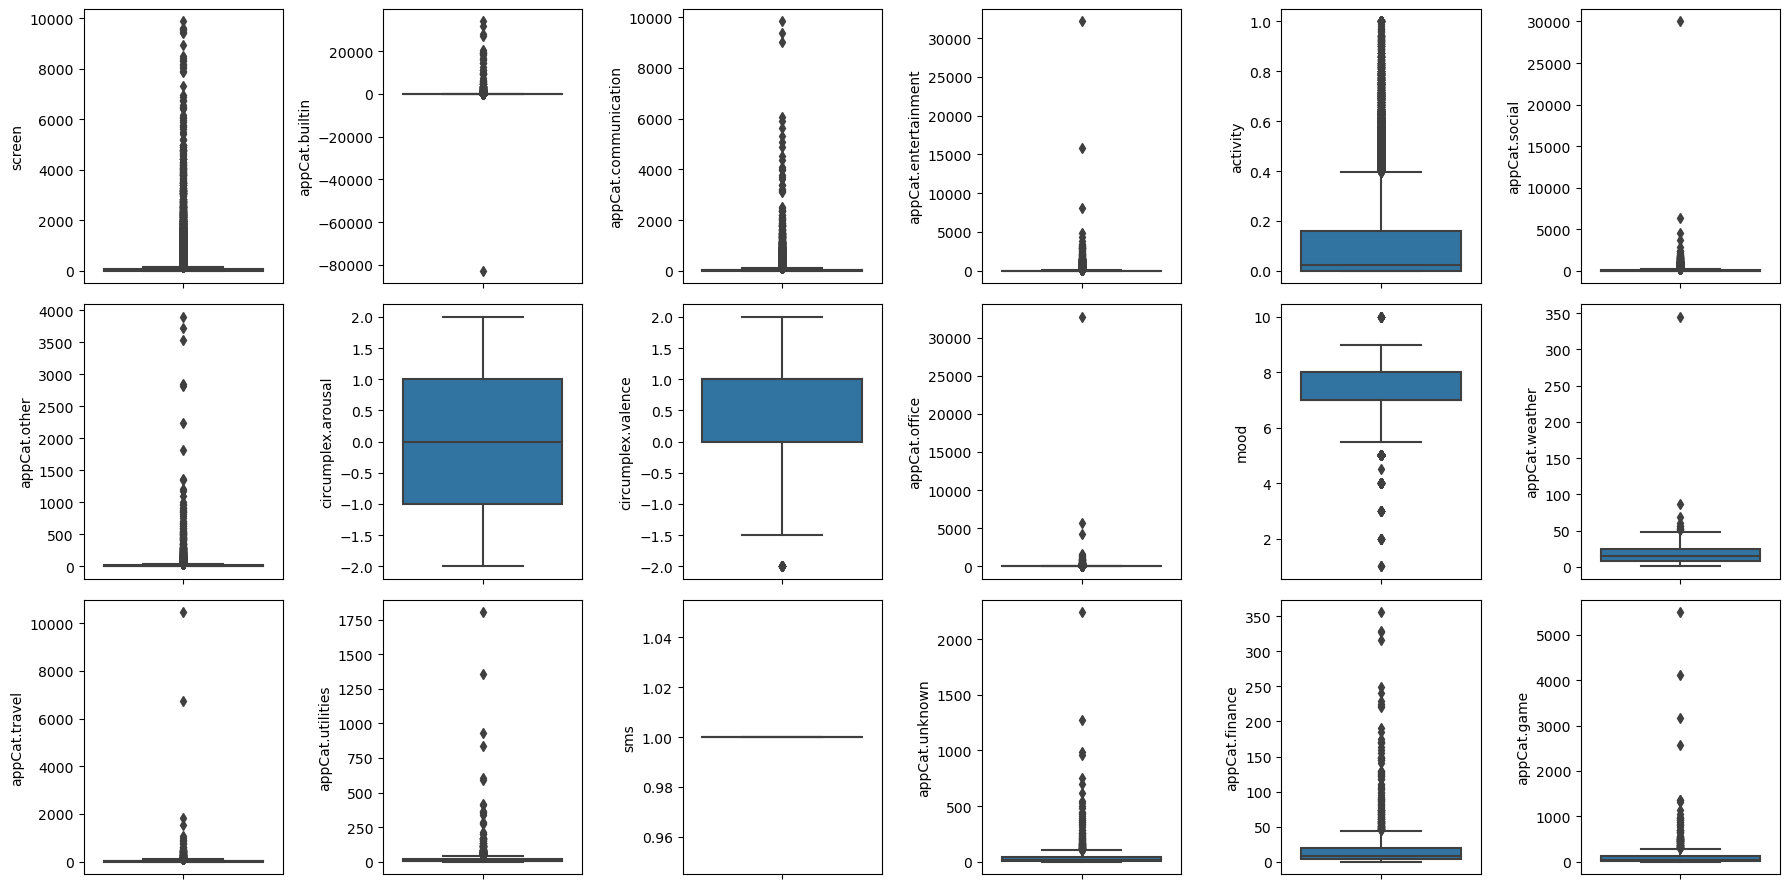

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个包含9个子图的 matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18,9))

# 在每个子图中绘制 sns 图形
sns.boxplot(y = g_df[var_list[0]], ax=axes[0,0])
sns.boxplot(y = g_df[var_list[1]], ax=axes[0,1])
sns.boxplot(y = g_df[var_list[2]], ax=axes[0,2])
sns.boxplot(y = g_df[var_list[3]], ax=axes[0,3])
sns.boxplot(y = g_df[var_list[4]], ax=axes[0,4])
sns.boxplot(y = g_df[var_list[5]], ax=axes[0,5])
sns.boxplot(y = g_df[var_list[6]], ax=axes[1,0])
sns.boxplot(y = g_df[var_list[7]], ax=axes[1,1])
sns.boxplot(y = g_df[var_list[8]], ax=axes[1,2])
sns.boxplot(y = g_df[var_list[9]], ax=axes[1,3])
sns.boxplot(y = g_df[var_list[10]], ax=axes[1,4])
sns.boxplot(y = g_df[var_list[18]], ax=axes[1,5])
sns.boxplot(y = g_df[var_list[12]], ax=axes[2,0])
sns.boxplot(y = g_df[var_list[13]], ax=axes[2,1])
sns.boxplot(y = g_df[var_list[14]], ax=axes[2,2])
sns.boxplot(y = g_df[var_list[15]], ax=axes[2,3])
sns.boxplot(y = g_df[var_list[16]], ax=axes[2,4])
sns.boxplot(y = g_df[var_list[17]], ax=axes[2,5])
# sns.boxplot(y = g_df[var_list[18]], ax=axes[2,5])

# 调整子图之间的间距
plt.tight_layout()
plt.savefig("./figures/box tailers.pdf",dpi=200, bbox_inches='tight')
# 显示图形
plt.show()


### 四分位法

In [9]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [10]:
out_iqr(g_df,'mood')

The IQR is nan
The lower bound value is nan
The upper bound value is nan
Total number of outliers are 0


In [ ]:
# 四分位法不好用，别用了

### Standard Deviation Method¶

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


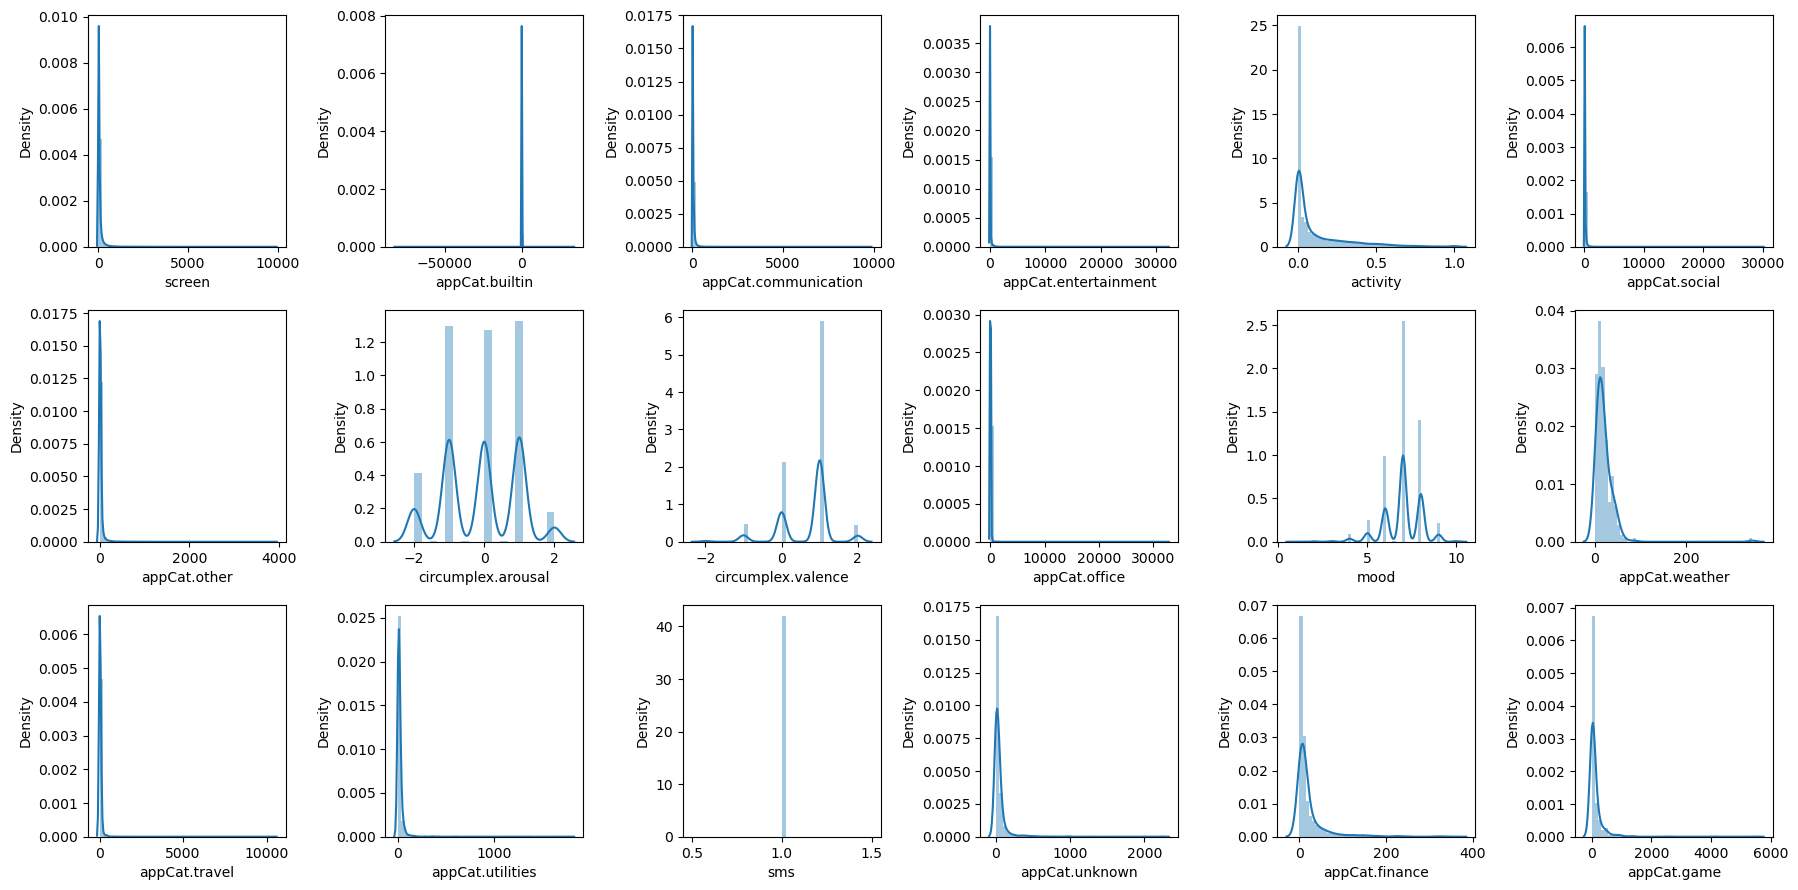

In [11]:
# plt.figure(figsize = (8,4))
# sns.distplot(g_df['mood'])
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 创建一个包含9个子图的 matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18,9))

# 在每个子图中绘制 sns 图形
sns.distplot(g_df[var_list[0]], ax=axes[0,0])
sns.distplot(g_df[var_list[1]], ax=axes[0,1])
sns.distplot(g_df[var_list[2]], ax=axes[0,2])
sns.distplot(g_df[var_list[3]], ax=axes[0,3])
sns.distplot(g_df[var_list[4]], ax=axes[0,4])
sns.distplot(g_df[var_list[5]], ax=axes[0,5])
sns.distplot(g_df[var_list[6]], ax=axes[1,0])
sns.distplot(g_df[var_list[7]], ax=axes[1,1])
sns.distplot(g_df[var_list[8]], ax=axes[1,2])
sns.distplot(g_df[var_list[9]], ax=axes[1,3])
sns.distplot(g_df[var_list[10]], ax=axes[1,4])
sns.distplot(g_df[var_list[18]], ax=axes[1,5])
sns.distplot(g_df[var_list[12]], ax=axes[2,0])
sns.distplot(g_df[var_list[13]], ax=axes[2,1])
sns.distplot(g_df[var_list[14]], ax=axes[2,2])
sns.distplot(g_df[var_list[15]], ax=axes[2,3])
sns.distplot(g_df[var_list[16]], ax=axes[2,4])
sns.distplot(g_df[var_list[17]], ax=axes[2,5])
# sns.boxplot(y = g_df[var_list[18]], ax=axes[2,5])

# 调整子图之间的间距
plt.tight_layout()
plt.savefig("./figures/all_distplot.pdf",dpi=200, bbox_inches='tight')
# 显示图形
plt.show()



In [12]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
    return df1.shape[0]+ df2.shape[0]

In [13]:
std_outliers_list=[]
for i in range(len(var_list)):
    print(var_list[i])
    out_std(g_df,var_list[i])
    std_outliers_list.append([var_list[i],out_std(g_df,var_list[i])])

screen
The lower bound value is -686.1322851062847
The upper bound value is 836.8026962557323
Total number of outliers are 1100
The lower bound value is -686.1322851062847
The upper bound value is 836.8026962557323
Total number of outliers are 1100
appCat.builtin
The lower bound value is -1229.4294657313735
The upper bound value is 1266.505989502296
Total number of outliers are 117
The lower bound value is -1229.4294657313735
The upper bound value is 1266.505989502296
Total number of outliers are 117
appCat.communication
The lower bound value is -343.39445908933135
The upper bound value is 430.08204336958306
Total number of outliers are 623
The lower bound value is -343.39445908933135
The upper bound value is 430.08204336958306
Total number of outliers are 623
appCat.entertainment
The lower bound value is -751.3049484679075
The upper bound value is 826.457908984037
Total number of outliers are 146
The lower bound value is -751.3049484679075
The upper bound value is 826.457908984037
Tot

In [14]:
(std_outliers_list)

[['screen', 1100],
 ['appCat.builtin', 117],
 ['appCat.communication', 623],
 ['appCat.entertainment', 146],
 ['activity', 503],
 ['appCat.social', 98],
 ['appCat.other', 58],
 ['circumplex.arousal', 0],
 ['circumplex.valence', 31],
 ['appCat.office', 6],
 ['mood', 33],
 ['call', 0],
 ['appCat.travel', 9],
 ['appCat.utilities', 17],
 ['sms', 0],
 ['appCat.unknown', 15],
 ['appCat.finance', 26],
 ['appCat.game', 8],
 ['appCat.weather', 1]]

10.0
2.0
2.0
9867.00699996948
1.0
344.863
2239.937
355.513
5491.793


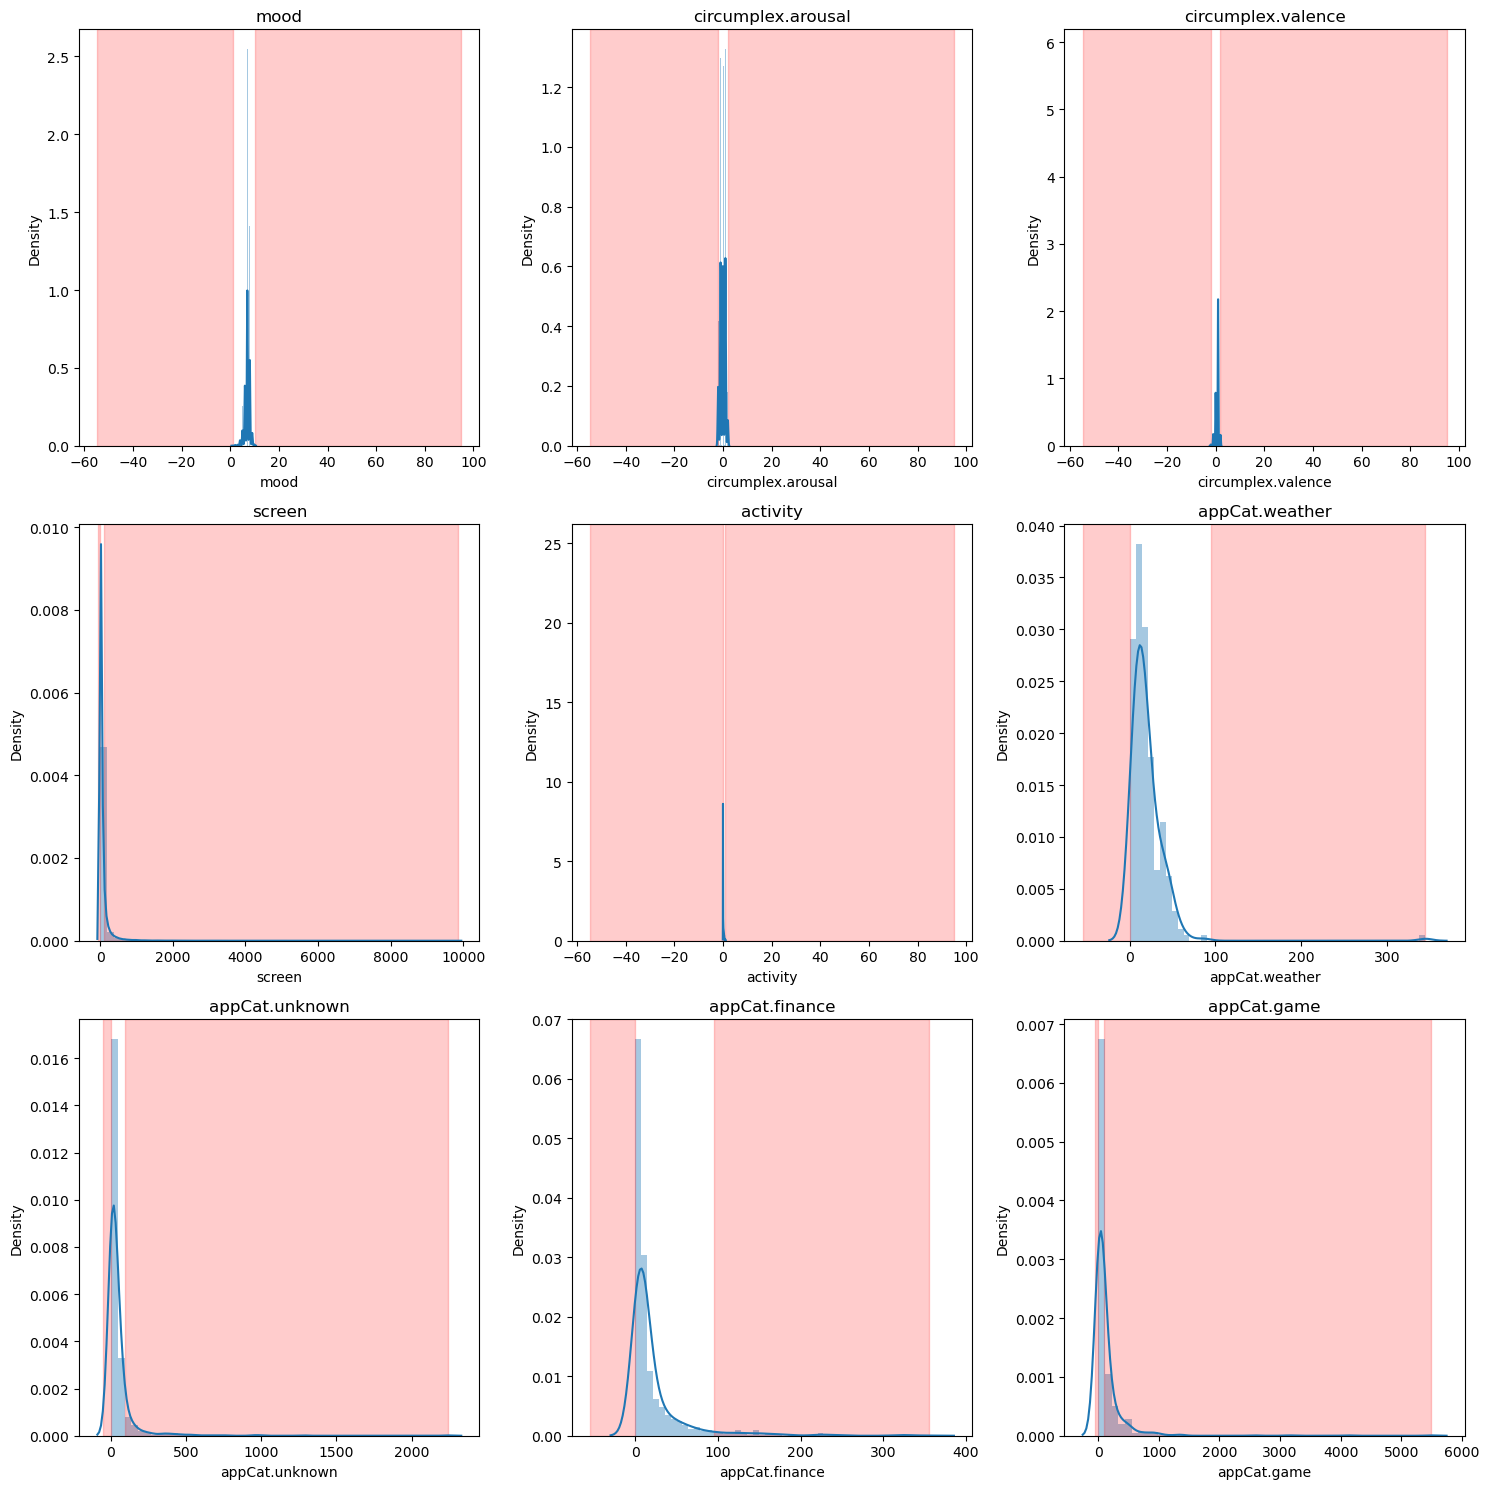

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 创建一个包含所有要绘制的变量的列表
# list = ['mood',"circumplex.arousal","circumplex.valence"]

list = ['mood',"circumplex.arousal","circumplex.valence","screen","activity","appCat.weather","appCat.unknown","appCat.finance","appCat.game"]

# 创建一个具有 1 行、3 列的子图布局
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# 遍历所有变量，依次绘制箱型图
# for i in range(len(list)):
#     var = list[i]
#     sns.distplot(g_df[var], ax=axes[i])
#     axes[i].set_title(var)
#     # 通过过滤列表中的 NaN 值，找到最大值和最小值
#     max_value = max(filter(lambda x: not math.isnan(x), g_df[var]))
#     min_value = min(filter(lambda x: not math.isnan(x), g_df[var]))
#     # 绘制红色矩形表示异常值的区域
# #     axes[i].axhspan(ymin=min_value, ymax=max_value, alpha=0.2, color='red')
#     axes[i].axvspan(xmin = lower,xmax= min_value,alpha=0.2, color='red')
#     axes[i].axvspan(xmin = upper,xmax= max_value,alpha=0.2, color='red')
    
    
for i in range(3):
    for j in range(3):
        var = list[i*3+j]
        sns.distplot(g_df[var], ax=axes[i, j])
        axes[i, j].set_title(var)
        max_value = max(filter(lambda x: not math.isnan(x), g_df[var]))
        min_value = min(filter(lambda x: not math.isnan(x), g_df[var]))
        axes[i, j].axvspan(xmin=lower, xmax=min_value, alpha=0.2, color='red')
        axes[i, j].axvspan(xmin=upper, xmax=max_value, alpha=0.2, color='red')  
        print(max_value)
# 调整子图之间的间距
plt.tight_layout()
plt.savefig("./figures/std_outlier.pdf",dpi=200, bbox_inches='tight')
# 显示图形
plt.show()


In [73]:
#Data Frame without outliers

# list = ['mood', 'circumplex.arousal', 'circumplex.valence', 'screen', 'activity', 'appCat.weather', 'appCat.unknown', 'appCat.finance', 'appCat.game']
list = var_list
mid_df = g_df
# i = 1
for i in range(len(list)):
    var = list[i]
    # var = 'appCat.weather'
    max_value = max(filter(lambda x: not math.isnan(x), g_df[var]))
    min_value = min(filter(lambda x: not math.isnan(x), g_df[var]))

    df_new = mid_df[(mid_df[var] < upper) & (mid_df[var] > lower)]  # 否则按照指定范围筛选并保留NaN值
    df_new = pd.concat([df_new, mid_df[mid_df[var].isnull()]])
    # max_value,min_value,upper,lower,df_new
    mid_df = df_new
mid_df

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
66832,AS14.06,2014-03-30 20:57:35.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.225,NaN,NaN,NaN,NaN,1.227,NaN
1294,AS14.01,2014-03-23 16:21:32.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.386,NaN,NaN,NaN,NaN,NaN,NaN
36215,AS14.03,2014-03-23 20:47:33.586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44.854,NaN,NaN,NaN,NaN,NaN,NaN
38266,AS14.03,2014-03-30 12:07:09.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.890,NaN,NaN,NaN,NaN,NaN,NaN
38268,AS14.03,2014-03-30 12:07:47.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.065,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358830,AS14.33,2014-05-30 20:45:55.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.528,NaN
358858,AS14.33,2014-05-30 21:21:52.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.851,NaN
358866,AS14.33,2014-05-30 21:26:51.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.507,NaN
358869,AS14.33,2014-05-30 21:27:29.605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.750,NaN


###  Z-Score method

<AxesSubplot:xlabel='mood', ylabel='Density'>

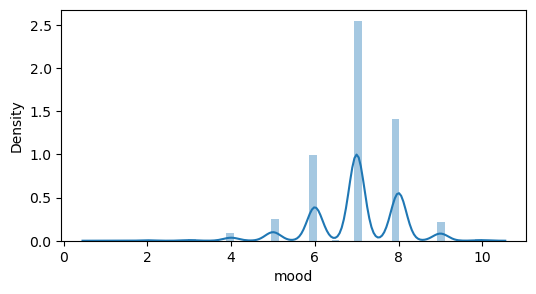

In [17]:
plt.figure(figsize = (6,3))
sns.distplot(g_df[var])

In [18]:
import math

def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 4
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

Total number of outliers are 708
Total number of outliers are 173
Total number of outliers are 1
Total number of outliers are 9
Total number of outliers are 12
Total number of outliers are 4


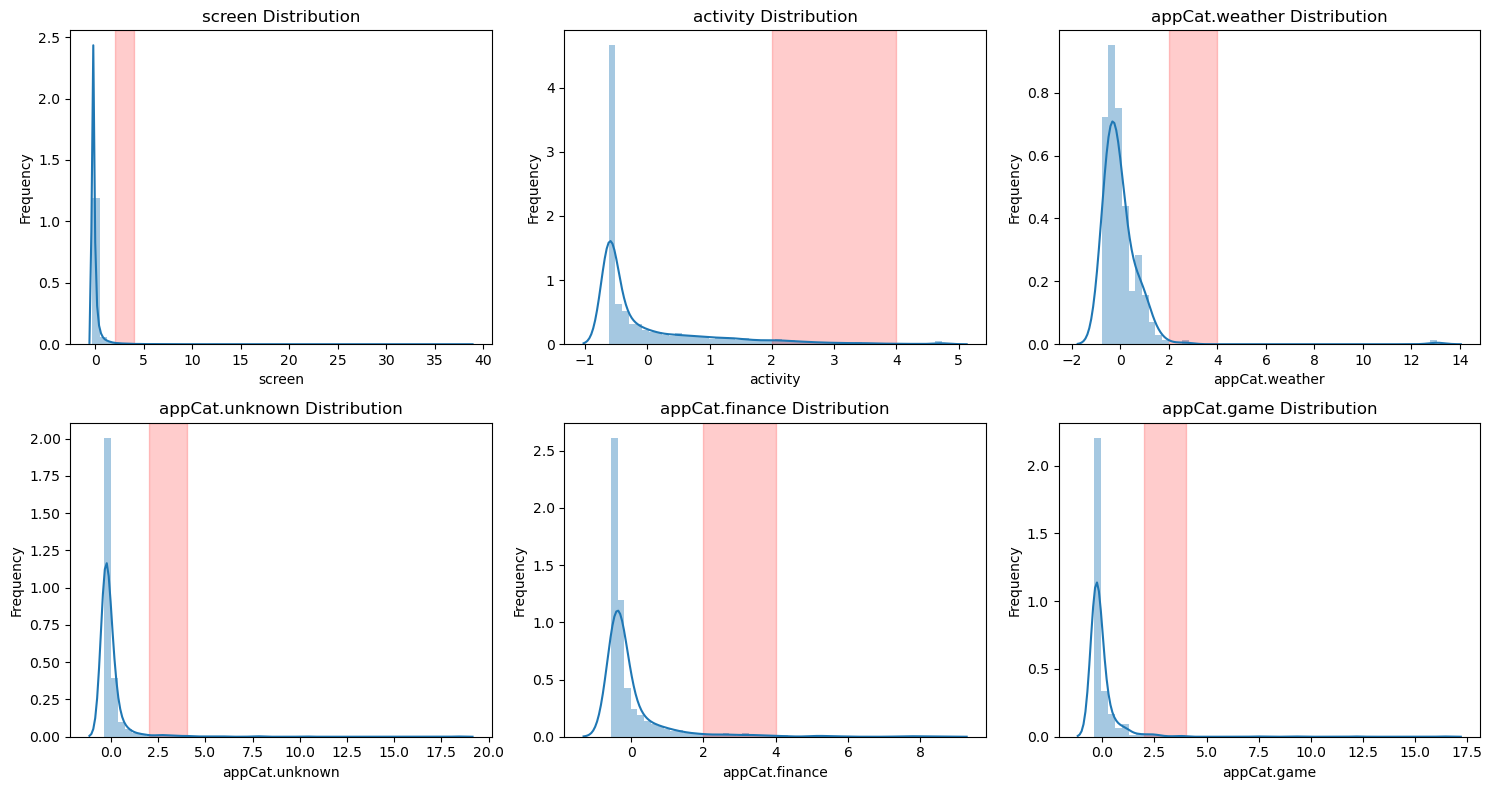

In [19]:
import matplotlib.pyplot as plt

list = ["screen","activity","appCat.weather","appCat.unknown","appCat.finance","appCat.game"]

# 创建一个大图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 遍历每个子图，画出直方图
for i, ax in enumerate(axes.flat):
    var = list[i]
    out_zscore(g_df[var])
    sns.distplot(zscore, ax=ax)
    ax.axvspan(xmin=4, xmax=max_value, alpha=0.2, color='red')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{var} Distribution')

# 调整子图之间的间距
plt.tight_layout()
plt.savefig("./figures/zscore.pdf",dpi=200, bbox_inches='tight')
# 显示图形
plt.show()
